In [2]:
import pandas as pd

Tractor=pd.read_csv("TractorSales.csv")
Tractor.head()

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [3]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(Tractor))

In [4]:
import calendar
Tractor['Month'] = dates.month
Tractor['Month'] = Tractor['Month'].apply(lambda x: calendar.month_abbr[x])
Tractor['Year'] = dates.year

In [5]:
#Tractor.drop(['Month-Year'], axis=1, inplace=True)
Tractor.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
Tractor = Tractor[['Month', 'Year', 'Tractor-Sales']]

In [6]:
Tractor.set_index(dates, inplace=True)

In [7]:
Tractor = Tractor[['Tractor-Sales']]
Tractor.head(5)

,Tractor-Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [9]:
Tractor.shape

(144, 1)

In [10]:
X = Tractor.values
train = X[0:100] # 27 data as train data
test = X[100:]  # 9 data as test data
predictions = []

In [27]:
X

array([[141],
       [157],
       [185],
       [199],
       [203],
       [189],
       [207],
       [207],
       [171],
       [150],
       [138],
       [165],
       [145],
       [168],
       [197],
       [208],
       [210],
       [209],
       [238],
       [238],
       [199],
       [168],
       [152],
       [196],
       [183],
       [200],
       [249],
       [251],
       [289],
       [249],
       [279],
       [279],
       [232],
       [204],
       [194],
       [232],
       [215],
       [239],
       [270],
       [279],
       [307],
       [305],
       [322],
       [339],
       [263],
       [241],
       [229],
       [272],
       [247],
       [261],
       [330],
       [362],
       [385],
       [340],
       [370],
       [381],
       [299],
       [266],
       [239],
       [281],
       [257],
       [250],
       [329],
       [350],
       [393],
       [370],
       [423],
       [410],
       [326],
       [289],
       [270],
      

In [11]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [18]:
predictions = model_ar_fit.predict(start=26,end=36)

In [17]:
import matplotlib.pyplot as plt

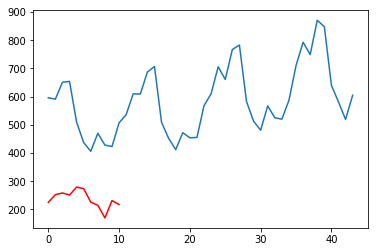

In [19]:
plt.plot(test)
plt.plot(predictions,color='red')

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

C:\Users\melam ropmay\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\melam ropmay\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\melam ropmay\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be i

928.7090977075525


In [22]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

array([553.32971628, 487.78403916, 506.37266614, 498.86282354,
       413.12741063, 390.72793631, 380.89698654, 438.37005283,
       422.91087207, 426.45104644])

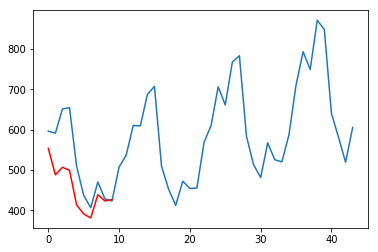

In [23]:
plt.plot(test)
plt.plot(predictions,color='red')

In [24]:
mean_squared_error(test,predictions)

ValueError: Found input variables with inconsistent numbers of samples: [44, 10]

In [25]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [26]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1222.4563850123272
(0, 0, 1) 1116.5333957203206
(0, 1, 0) 1014.8448037143847
(0, 1, 1) 1014.6052369342258
(0, 1, 2) 1016.4414095654025
(0, 1, 3) 989.7756941782426
(0, 1, 4) 989.6302044177677
(0, 2, 0) 1058.0614979920792
(0, 2, 1) 1012.1302544410355
(0, 2, 2) 1011.63847887159
(1, 0, 0) 1028.5497924884785
(1, 0, 1) 1027.0030831260842
(1, 0, 2) 1028.9986574650816
(1, 0, 3) 1703.7461861606344
(1, 0, 4) 1483.857061728835
(1, 1, 0) 1014.8282076765598
(1, 1, 1) 1008.2456454768711
(1, 1, 2) 1001.7853337937439
(1, 1, 3) 990.7940088424396
(1, 1, 4) 974.4335767955193
(1, 2, 0) 1042.8599345401437
(1, 2, 1) 1011.8361659772834
(2, 0, 0) 1027.0802210312042
(2, 0, 1) 1028.998207230894
(2, 0, 3) 1020.8101225750344
(2, 1, 0) 1016.3926775532161
(2, 1, 1) 998.6946155183286
(2, 1, 2) 997.5325810705132
(2, 1, 3) 990.0687403744995
(2, 1, 4) 975.0585405192129
(2, 2, 0) 1035.0219405337662
(2, 2, 1) 1013.5312210323823
(2, 2, 2) 1006.7190193016131
(3, 0, 0) 1029.005906708409
(3, 0, 1) 1022.530004911008